In [99]:
#Question 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [100]:
data = pd.read_excel("datasets/dairy_nutrition_1.xlsx")
data.head()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [101]:
data_reduced = data.drop(['Type','Description'], axis=1)
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [102]:
data_standardized = (data_reduced - data_reduced.mean())/data_reduced.std()
data_standardized.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.657532,0.904055,-0.234581,-0.643818,-0.977573,0.774993,0.492979,0.341959
1,-0.933816,0.720562,0.064465,0.008021,0.486734,-0.407176,-0.673367,-0.813549
2,-0.816833,-1.099624,1.172443,0.074835,0.058347,-0.549036,-0.402397,-0.679323
3,-0.938650,-0.833395,-0.487014,-0.232345,-0.619285,-0.466284,-0.484866,-0.778534
4,-0.938650,-0.831757,-0.488448,-0.232345,-0.619285,-0.466284,-0.484866,-0.778534


In [103]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=8).fit(data_standardized)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_standardized) #transform the recentered data
pca_samples[0:5,:]

array([[ 0.79122007, -0.49746665,  0.76682929, -0.31904076, -1.42182931,
         0.14435026,  0.16665556,  0.04352438],
       [-0.86773589, -0.29048826, -1.2395636 ,  0.6622051 , -0.22041668,
         0.16440741, -0.13009636,  0.09223224],
       [-1.28342071,  1.08984498, -0.27602996,  0.21466251,  0.7764928 ,
         0.41071646,  0.61884514,  0.27029512],
       [-1.71476979, -0.05412661,  0.4421568 ,  0.19621962,  0.18972422,
         0.03971177, -0.30639378,  0.01015101],
       [-1.71439659, -0.05554888,  0.44162738,  0.19627838,  0.18869876,
         0.0395057 , -0.30745219,  0.00986619]])

In [104]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [105]:
pca_results = pca_results(data_standardized, pca)
pca_results

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7805,0.4726,0.4672,0.2910,0.0722,0.0973,0.3685,0.3653,0.4428,0.4658
PC 2,2.1733,0.2717,-0.1304,-0.3270,0.6181,0.6013,-0.1793,0.2452,0.1731,-0.1013
PC 3,0.8717,0.1090,0.1499,-0.5816,-0.2952,-0.3342,-0.4485,0.3675,0.3054,0.1048
PC 4,0.4526,0.0566,-0.3557,-0.0411,-0.0879,-0.1750,0.5117,0.6183,-0.0237,-0.4345
PC 5,0.3354,0.0419,0.0185,-0.6631,-0.0425,0.0488,0.6043,-0.3922,0.0352,0.1882
PC 6,0.1728,0.0216,-0.1596,0.1216,0.2826,-0.3722,0.0149,-0.3497,0.7240,-0.3077
PC 7,0.1374,0.0172,0.4297,-0.1099,0.6124,-0.5143,0.0459,0.0749,-0.3875,-0.0765
PC 8,0.0764,0.0095,-0.6365,0.0427,0.2474,-0.2851,-0.0395,0.0857,-0.0674,0.6611


<Figure size 640x480 with 0 Axes>

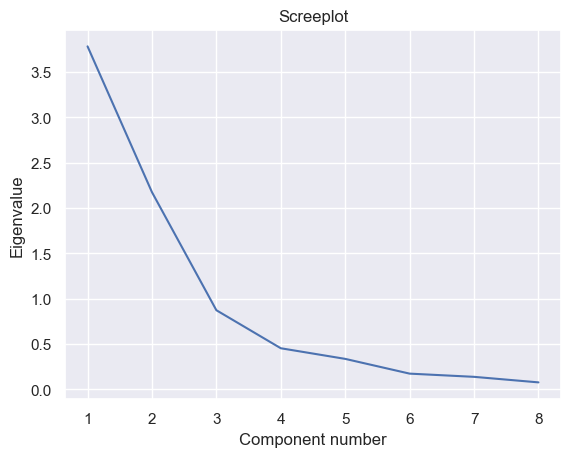

In [106]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [107]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(data_standardized)
scores2 = pca2.transform(data_standardized)
scores2

array([[ 7.91220071e-01, -4.97466649e-01],
       [-8.67735892e-01, -2.90488255e-01],
       [-1.28342071e+00,  1.08984498e+00],
       [-1.71476979e+00, -5.41266096e-02],
       [-1.71439659e+00, -5.55488807e-02],
       [-1.69187747e+00,  1.45806541e+00],
       [-1.41994189e+00,  3.90225080e-01],
       [-1.74875842e+00,  4.46203987e-01],
       [-1.02680725e+00, -8.27895211e-01],
       [-1.34560450e+00, -4.95902590e-03],
       [-1.25534537e+00, -1.38321653e-01],
       [-1.74747501e+00,  4.21358949e-01],
       [-1.66436846e+00, -4.55143426e-01],
       [-1.59859548e+00,  4.67199098e-01],
       [-1.69289873e+00,  5.60649721e-01],
       [-4.90735602e-01, -1.08737008e+00],
       [ 1.09943787e+00, -1.00004825e+00],
       [-1.79012995e+00, -3.05383180e-01],
       [-1.80680246e+00, -8.72078863e-02],
       [-1.88798706e+00, -2.65901934e-01],
       [-1.85184367e+00, -3.20742248e-02],
       [ 1.42990964e+00, -1.52019858e+00],
       [ 2.26440263e+00, -1.50379744e+00],
       [-1.

In [108]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)    
    return ax

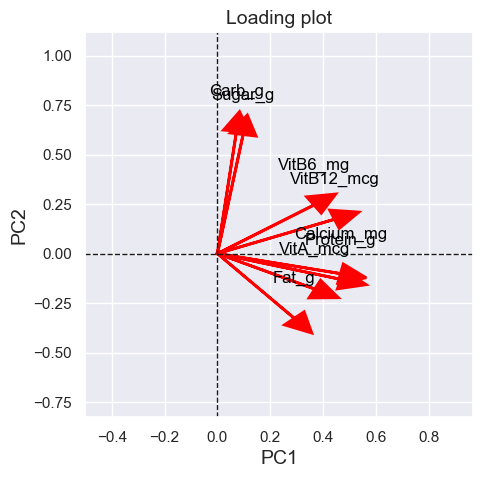

In [109]:
plt.clf
ax2 = loadingplot(data_standardized,pca2)
plt.show()

In [110]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_standardized, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred

,PC1,PC2
0,0.791220,-0.497467
1,-0.867736,-0.290488
2,-1.283421,1.089845
3,-1.714770,-0.054127
4,-1.714397,-0.055549
...,...,...
162,1.170550,0.773216
163,-0.349469,4.307909
164,-0.858317,3.615061
165,-1.258353,5.125380


In [111]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC2",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

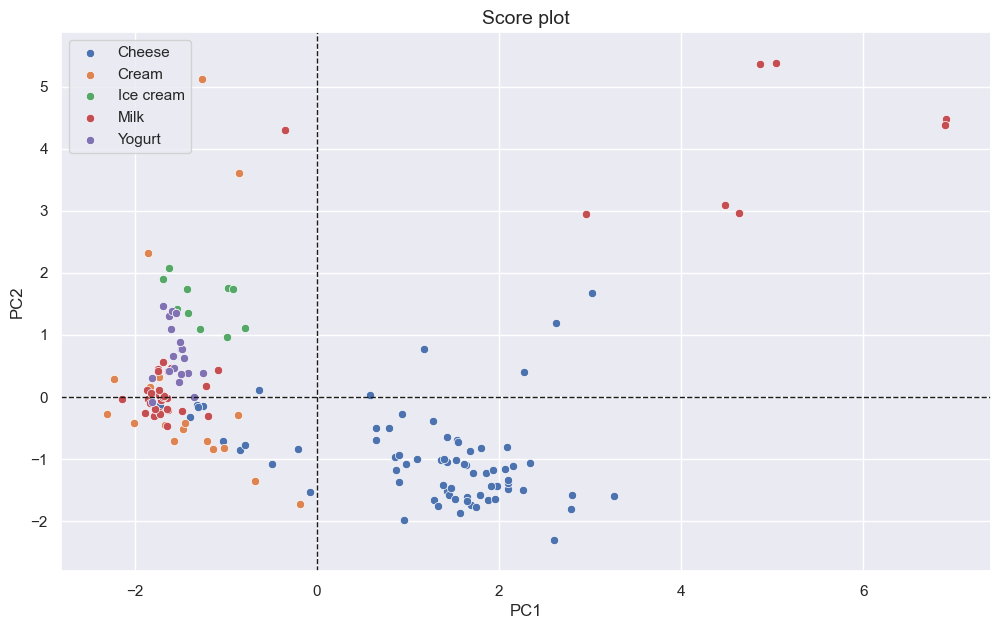

In [112]:
plt.clf
ax3 = scoreplot_label(data, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()

### Product 1

In [113]:
#Product 1
data2 = data.drop('Description',axis=1)
data2 = data2.append({
    'Type':'Unknown',
    'Protein_g':22.17,
    'Fat_g':22.35,
    'Carb_g':2.22,
    'Sugar_g':1.01,
    'VitA_mcg':181,
    'VitB6_mg':0.034,
    'VitB12_mcg':2.28,
    'Calcium_mg':505
}, ignore_index=True)
data2

C:\Users\kieny\AppData\Local\Temp\ipykernel_8012\297703406.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append({


,Type,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,3.15,3.27,4.78,5.05,46,0.036,0.45,113
...,...,...,...,...,...,...,...,...,...
163,Milk,7.91,8.70,54.40,54.40,74,0.051,0.44,284
164,Cream,4.79,35.48,54.88,54.88,2,0.000,0.00,22
165,Cream,0.68,21.47,75.42,58.01,0,0.004,0.00,5
166,Milk,25.61,25.98,39.33,39.33,258,0.302,3.25,824


In [114]:
data_reduced = data2.drop(['Type'], axis=1)
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [115]:
data_standardized = (data_reduced - data_reduced.mean())/data_reduced.std()
data_standardized.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.652553,0.900967,-0.230963,-0.641797,-0.982544,0.779688,0.480484,0.340671
1,-0.939721,0.717216,0.068579,0.011387,0.485346,-0.405184,-0.679709,-0.817850
2,-0.822671,-1.105529,1.178389,0.078338,0.055910,-0.547369,-0.410169,-0.683275
3,-0.944558,-0.838926,-0.483813,-0.229474,-0.623379,-0.464428,-0.492203,-0.782744
4,-0.944558,-0.837285,-0.485249,-0.229474,-0.623379,-0.464428,-0.492203,-0.782744


In [116]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=8).fit(data_standardized)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_standardized) #transform the recentered data
pca_samples[0:5,:]

array([[ 0.78484259, -0.48805817,  0.76728726, -0.31065047, -1.42611286,
         0.12020213,  0.18171789,  0.04860223],
       [-0.87293068, -0.28732216, -1.24409806,  0.66192963, -0.21896897,
         0.17562579, -0.11723558,  0.09948335],
       [-1.30030868,  1.08871362, -0.27700019,  0.21082008,  0.77946749,
         0.35535647,  0.65372576,  0.27033267],
       [-1.72464356, -0.06159196,  0.44048797,  0.1958599 ,  0.19121948,
         0.05834095, -0.30174377,  0.01917234],
       [-1.72425937, -0.06301316,  0.43995582,  0.19591989,  0.19019226,
         0.05822085, -0.3028208 ,  0.0189043 ]])

In [117]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data2, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data2.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [118]:
pca_results = pca_results(data_standardized, pca)
pca_results

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7733,0.4717,0.4684,0.2936,0.0679,0.0934,0.3700,0.3625,0.4417,0.4666
PC 2,2.1739,0.2717,-0.1271,-0.3240,0.6192,0.6028,-0.1753,0.2504,0.1711,-0.0967
PC 3,0.8690,0.1086,0.1508,-0.5815,-0.2936,-0.3327,-0.4498,0.3673,0.3065,0.1051
PC 4,0.4532,0.0566,-0.3526,-0.0414,-0.0891,-0.1755,0.5098,0.6248,-0.0345,-0.4287
PC 5,0.3347,0.0418,0.0166,-0.6633,-0.0424,0.0478,0.6052,-0.3922,0.0396,0.1846
PC 6,0.1805,0.0226,-0.1739,0.1291,0.2310,-0.3229,0.0156,-0.3459,0.7522,-0.3314
PC 7,0.1380,0.0173,0.4060,-0.0999,0.6356,-0.5459,0.0451,0.0472,-0.3346,-0.0836
PC 8,0.0774,0.0097,-0.6497,0.0488,0.2423,-0.2861,-0.0406,0.0705,-0.0346,0.6536


<Figure size 640x480 with 0 Axes>

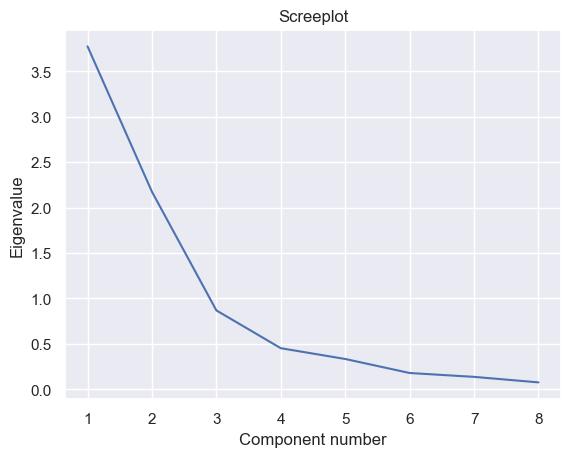

In [119]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [120]:
#Extract only the three PCs
pca3 = PCA(n_components=3).fit(data_standardized)
scores3 = pca3.transform(data_standardized)
scores3

array([[ 7.84842587e-01, -4.88058169e-01,  7.67287255e-01],
       [-8.72930676e-01, -2.87322165e-01, -1.24409806e+00],
       [-1.30030868e+00,  1.08871362e+00, -2.77000186e-01],
       [-1.72464356e+00, -6.15919638e-02,  4.40487975e-01],
       [-1.72425937e+00, -6.30131555e-02,  4.39955824e-01],
       [-1.71263469e+00,  1.45415630e+00,  1.56294118e-01],
       [-1.43387423e+00,  3.83972455e-01,  8.55647418e-01],
       [-1.76146336e+00,  4.40613892e-01,  6.59362674e-02],
       [-1.02885232e+00, -8.27345315e-01, -6.89099064e-01],
       [-1.35706637e+00, -1.19184832e-02,  1.13646915e+00],
       [-1.26431722e+00, -1.41979588e-01,  6.43759549e-01],
       [-1.76030504e+00,  4.15946200e-01,  2.36030025e-01],
       [-1.67060576e+00, -4.62003189e-01, -1.55592629e-01],
       [-1.61199438e+00,  4.61915461e-01,  2.53320604e-01],
       [-1.70649322e+00,  5.56234095e-01,  1.85627989e-01],
       [-4.89790914e-01, -1.08302863e+00, -1.04331737e+00],
       [ 1.09850618e+00, -9.91160389e-01

In [121]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data2, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data2.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)    
    return ax

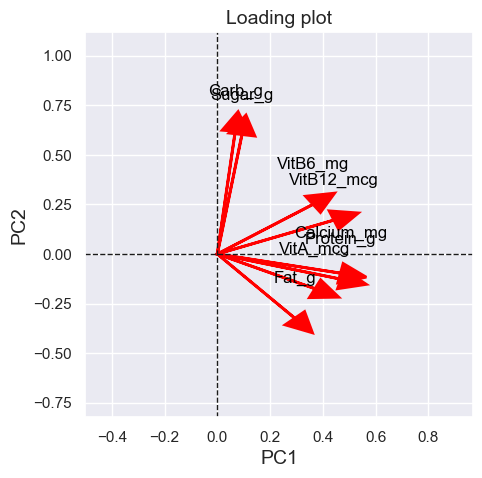

In [122]:
plt.clf
ax3 = loadingplot(data_standardized,pca3)
plt.show()

In [123]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_standardized, pca3.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2','PC3'])
scores2_notcentred

,PC1,PC2,PC3
0,0.784843,-0.488058,0.767287
1,-0.872931,-0.287322,-1.244098
2,-1.300309,1.088714,-0.277000
3,-1.724644,-0.061592,0.440488
4,-1.724259,-0.063013,0.439956
...,...,...,...
163,-0.386036,4.325953,-2.120656
164,-0.888762,3.630599,-3.674380
165,-1.300209,5.140606,-3.565082
166,4.444908,3.140560,-0.337945


In [124]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data2, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data2['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data2['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC2",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

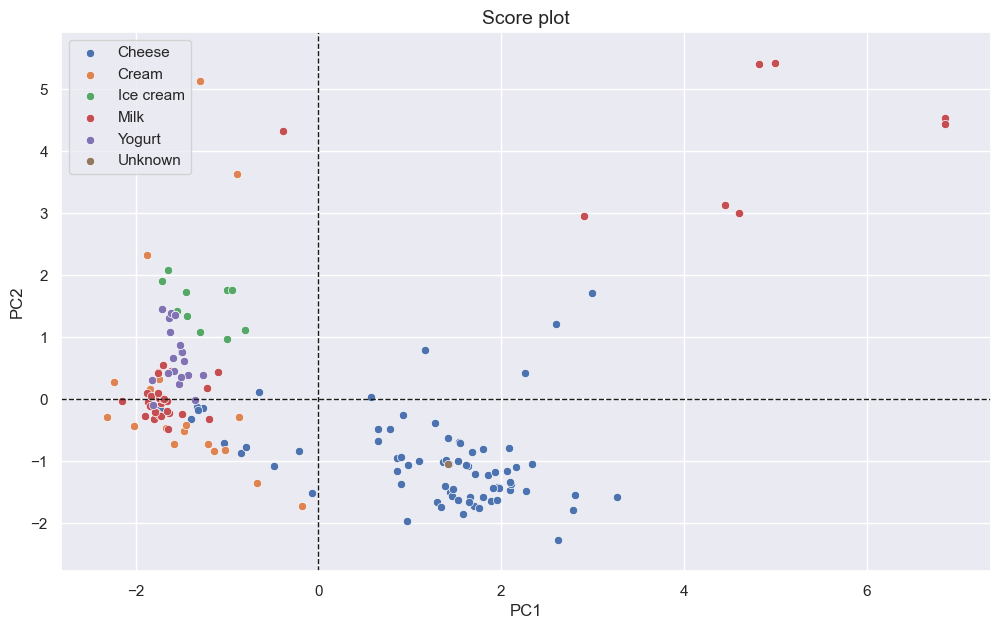

In [125]:
plt.clf
ax3 = scoreplot_label(data2, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()

In [126]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data2, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data2['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data2['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC3",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC3'].min(),0)-margin
    y_max = max(scores['PC3'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

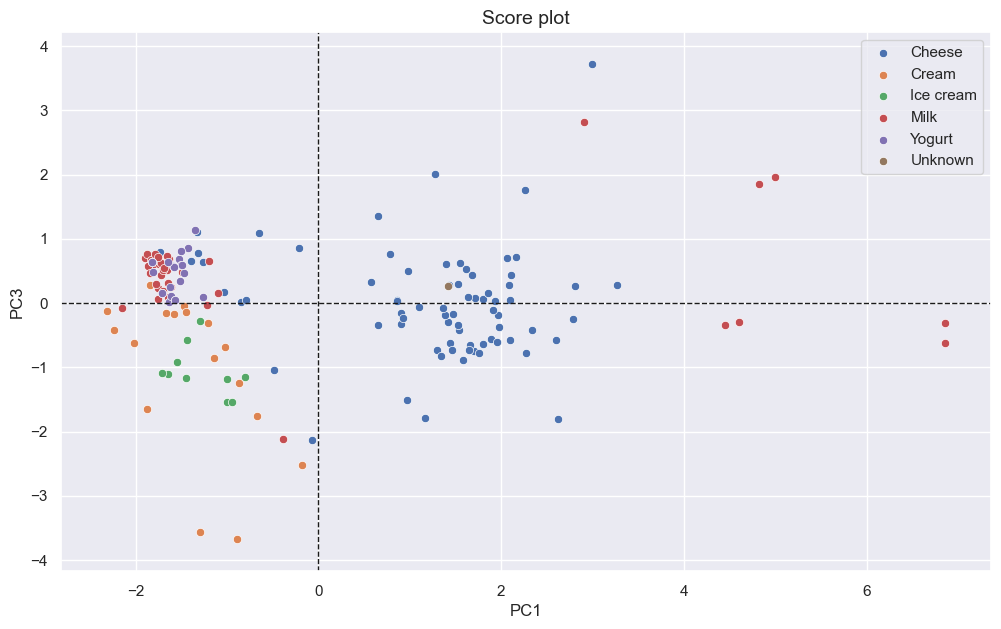

In [127]:
plt.clf
ax3 = scoreplot_label(data2, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()

In [128]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data2, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data2['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data2['Type'] == product_type
        ax = sns.scatterplot(x="PC2", y="PC3",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC2'].min(),0)-margin
    x_max = max(scores['PC2'].max(),0)+margin
    y_min = min(scores['PC3'].min(),0)-margin
    y_max = max(scores['PC3'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

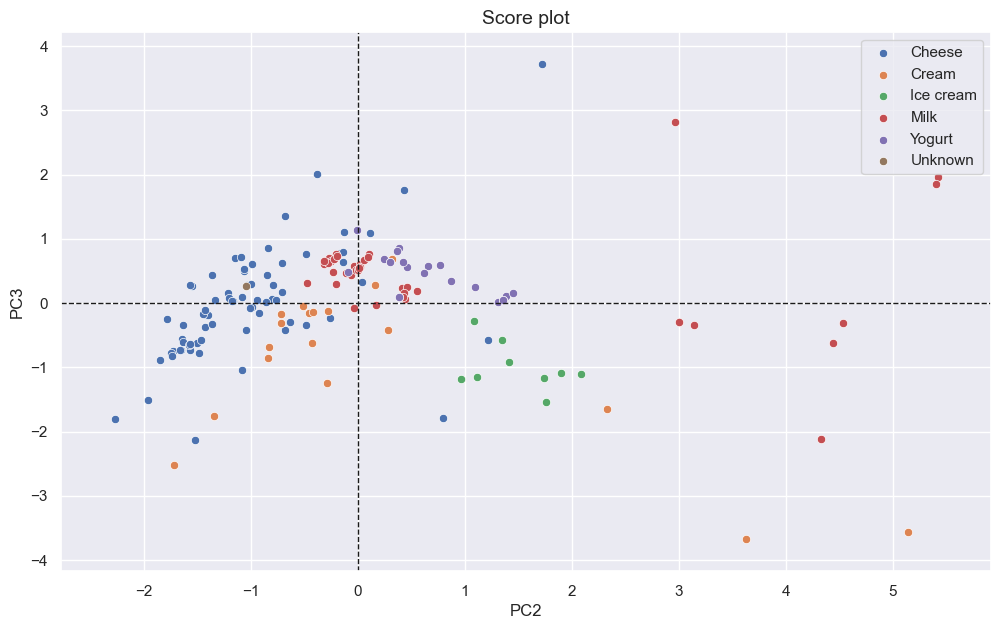

In [129]:
plt.clf
ax3 = scoreplot_label(data2, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()

### Product 2

In [130]:
#Product 2
data3 = data.drop('Description',axis=1)
data3 = data3.append({
    'Type':'Unknown',
    'Protein_g':4.32,
    'Fat_g':1.42,
    'Carb_g':23.0,
    'Sugar_g':14.58,
    'VitA_mcg':13,
    'VitB6_mg':0.047,
    'VitB12_mcg':0.53,
    'Calcium_mg':114
}, ignore_index=True)
data3

C:\Users\kieny\AppData\Local\Temp\ipykernel_8012\855783713.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append({


,Type,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,3.15,3.27,4.78,5.05,46,0.036,0.45,113
...,...,...,...,...,...,...,...,...,...
163,Milk,7.91,8.70,54.40,54.40,74,0.051,0.44,284
164,Cream,4.79,35.48,54.88,54.88,2,0.000,0.00,22
165,Cream,0.68,21.47,75.42,58.01,0,0.004,0.00,5
166,Milk,25.61,25.98,39.33,39.33,258,0.302,3.25,824


In [131]:
data_reduced = data3.drop(['Type'], axis=1)
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [132]:
data_standardized = (data_reduced - data_reduced.mean())/data_reduced.std()
data_standardized.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.663086,0.910014,-0.239692,-0.648429,-0.973047,0.779067,0.496567,0.346994
1,-0.929800,0.726499,0.059655,0.004792,0.492299,-0.406255,-0.672752,-0.809908
2,-0.812705,-1.093899,1.168744,0.071747,0.063608,-0.548494,-0.401092,-0.675520
3,-0.934639,-0.827639,-0.492377,-0.236083,-0.614504,-0.465521,-0.483771,-0.774850
4,-0.934639,-0.826000,-0.493813,-0.236083,-0.614504,-0.465521,-0.483771,-0.774850


In [133]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=8).fit(data_standardized)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_standardized) #transform the recentered data
pca_samples[0:5,:]

array([[ 0.80548961, -0.50046939,  0.7690605 , -0.31346321, -1.42363314,
         0.14529416,  0.16660902,  0.04327125],
       [-0.85881134, -0.30457522, -1.2396905 ,  0.66620073, -0.21910876,
         0.16506624, -0.13082166,  0.09225194],
       [-1.28317254,  1.07436386, -0.27746629,  0.21333564,  0.77723301,
         0.40960546,  0.61863083,  0.26915872],
       [-1.70675299, -0.07342039,  0.44230097,  0.19677187,  0.19022587,
         0.03876807, -0.30809982,  0.00997963],
       [-1.70637048, -0.07484133,  0.44177269,  0.19683495,  0.18919995,
         0.03856362, -0.30915948,  0.00969613]])

In [134]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data3, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data3.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [135]:
pca_results = pca_results(data_standardized, pca)
pca_results

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7831,0.4729,0.4677,0.2928,0.0678,0.0936,0.3695,0.3646,0.4421,0.4661
PC 2,2.1773,0.2722,-0.1274,-0.3252,0.6185,0.6018,-0.1774,0.2472,0.1760,-0.0983
PC 3,0.8685,0.1086,0.1489,-0.5810,-0.2951,-0.3350,-0.4487,0.3682,0.3054,0.1037
PC 4,0.4515,0.0564,-0.3562,-0.0381,-0.0874,-0.1742,0.5094,0.6196,-0.0252,-0.4355
PC 5,0.3339,0.0417,0.0170,-0.6637,-0.0429,0.0474,0.6061,-0.3896,0.0365,0.1863
PC 6,0.1726,0.0216,-0.1602,0.1228,0.2825,-0.3723,0.0150,-0.3489,0.7238,-0.3083
PC 7,0.1370,0.0171,0.4291,-0.1097,0.6129,-0.5146,0.0461,0.0750,-0.3873,-0.0754
PC 8,0.0761,0.0095,-0.6371,0.0430,0.2466,-0.2843,-0.0395,0.0857,-0.0670,0.6613


<Figure size 640x480 with 0 Axes>

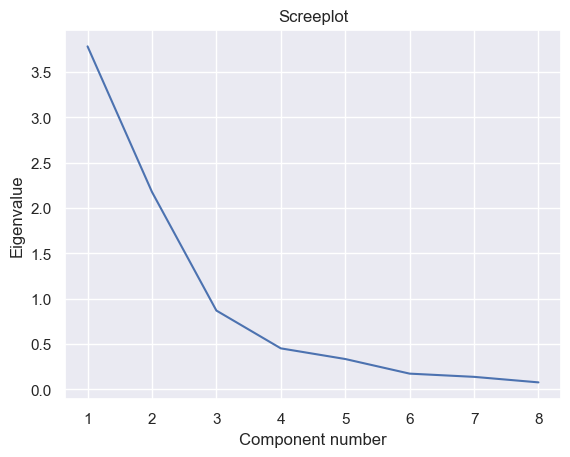

In [136]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [137]:
#Extract only the three PCs
pca2 = PCA(n_components=3).fit(data_standardized)
scores2 = pca2.transform(data_standardized)
scores2

array([[ 8.05489605e-01, -5.00469386e-01,  7.69060503e-01],
       [-8.58811339e-01, -3.04575220e-01, -1.23969050e+00],
       [-1.28317254e+00,  1.07436386e+00, -2.77466295e-01],
       [-1.70675299e+00, -7.34203928e-02,  4.42300972e-01],
       [-1.70637048e+00, -7.48413349e-02,  4.41772688e-01],
       [-1.69346077e+00,  1.44102702e+00,  1.53658608e-01],
       [-1.41392307e+00,  3.73589751e-01,  8.55225624e-01],
       [-1.74447130e+00,  4.27278694e-01,  6.60487826e-02],
       [-1.01394227e+00, -8.43800940e-01, -6.82876611e-01],
       [-1.33673853e+00, -2.17006486e-02,  1.13732909e+00],
       [-1.24626556e+00, -1.54869028e-01,  6.45030139e-01],
       [-1.74268234e+00,  4.02559951e-01,  2.36056009e-01],
       [-1.65469452e+00, -4.74221437e-01, -1.53466681e-01],
       [-1.59377776e+00,  4.49386019e-01,  2.53708020e-01],
       [-1.68898137e+00,  5.42220608e-01,  1.85564872e-01],
       [-4.76507077e-01, -1.10021823e+00, -1.03738598e+00],
       [ 1.11539694e+00, -1.00145980e+00

In [138]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data3, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data3.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)    
    return ax

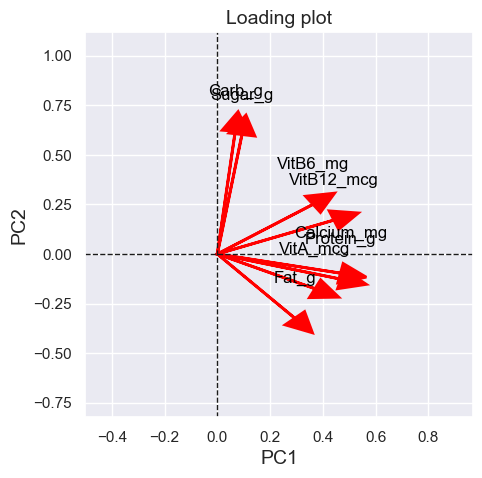

In [139]:
plt.clf
ax3 = loadingplot(data_standardized,pca3)
plt.show()

In [140]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_standardized, pca3.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2','PC3'])
scores2_notcentred

,PC1,PC2,PC3
0,0.804563,-0.501412,0.769478
1,-0.857817,-0.302157,-1.243740
2,-1.283429,1.072905,-0.277514
3,-1.707587,-0.076947,0.439154
4,-1.707204,-0.078367,0.438623
...,...,...,...
163,-0.369685,4.309603,-2.120933
164,-0.874311,3.614141,-3.674677
165,-1.285410,5.123097,-3.565984
166,4.470972,3.130474,-0.328000


In [141]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data3, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data3['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data3['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC2",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

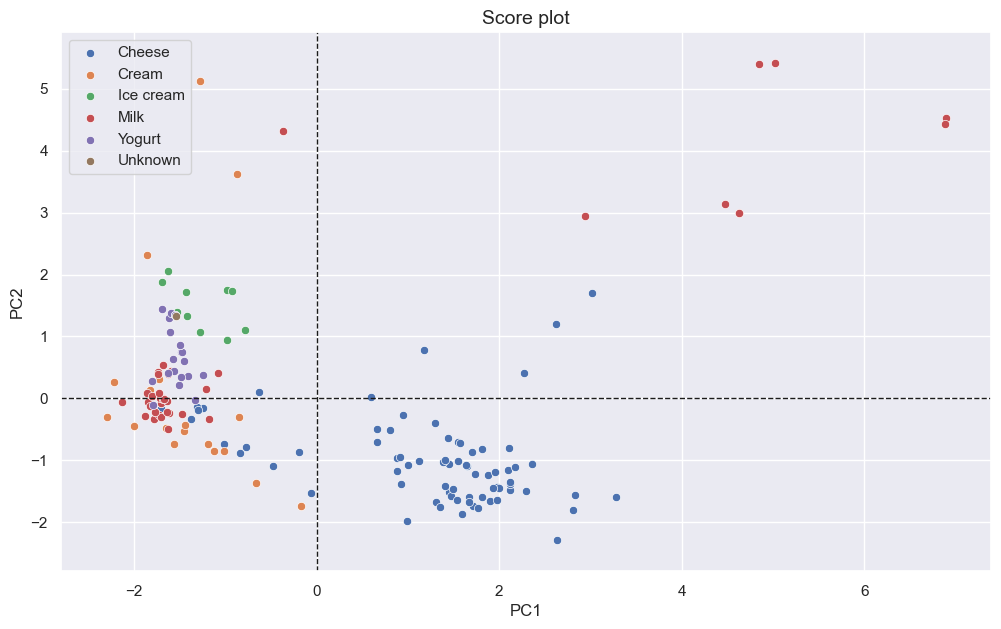

In [142]:
plt.clf
ax3 = scoreplot_label(data3, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()

In [143]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data3, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data3['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data3['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC3",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC3'].min(),0)-margin
    y_max = max(scores['PC3'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

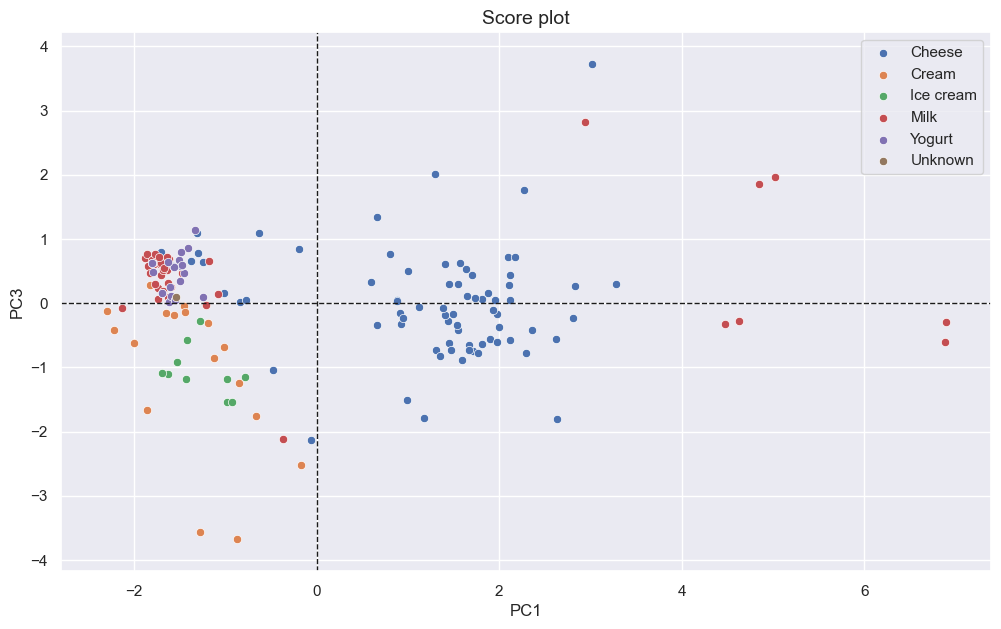

In [144]:
plt.clf
ax3 = scoreplot_label(data3, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()

In [145]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data3, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data3['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data3['Type'] == product_type
        ax = sns.scatterplot(x="PC2", y="PC3",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC2'].min(),0)-margin
    x_max = max(scores['PC2'].max(),0)+margin
    y_min = min(scores['PC3'].min(),0)-margin
    y_max = max(scores['PC3'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

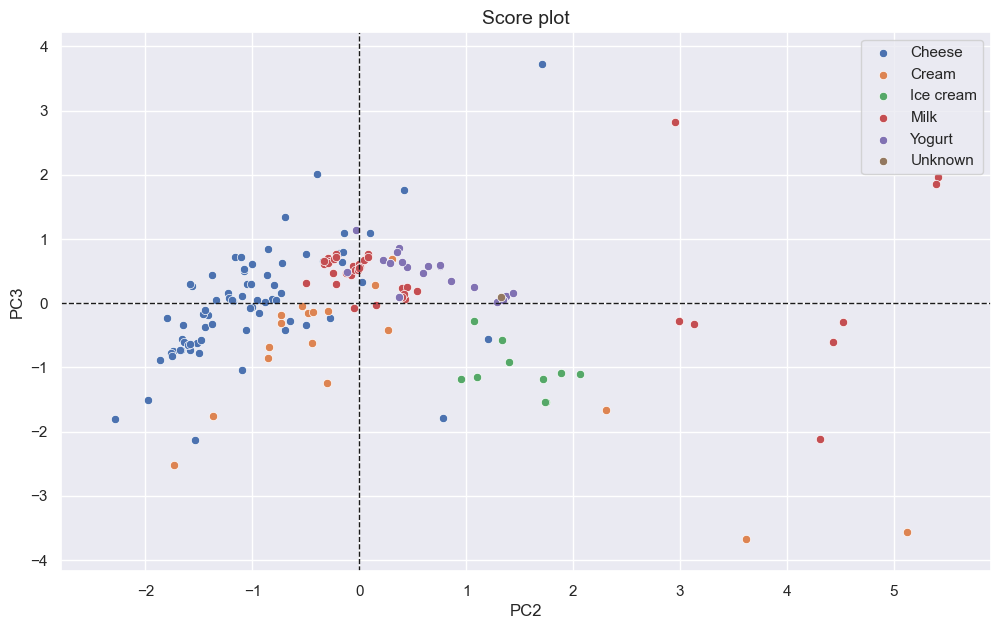

In [146]:
plt.clf
ax3 = scoreplot_label(data3, scores2_notcentred, pca, width=12, margin = 0.5)
plt.show()